# Import Data

In [131]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Connect to PostgreSQL server
import os
from dotenv import load_dotenv
load_dotenv()
from pangres import upsert
from sqlalchemy import text, create_engine

# db info
db_username = os.environ.get('db_username')
db_password = os.environ.get('db_password')
db_host = os.environ.get('db_host')
db_port = os.environ.get('db_port')
db_name = os.environ.get('db_name')

def create_db_connection_string(db_username, db_password, db_host, db_port, db_name):
    connection_url = 'postgresql+psycopg2://' + db_username + ':' + db_password + '@' + db_host + ':' + db_port + '/' + db_name
    return connection_url

conn = create_db_connection_string(db_username, db_password, db_host, db_port, db_name)

db_engine = create_engine(conn, pool_recycle = 3600)

# Create DataFrame
with db_engine.connect() as connection:
    df = pd.read_sql(text('select * from soloq.matchesv2'), connection)


In [2]:
df.head()

,uuid,totalHealsOnTeammates,largestCriticalStrike,damageSelfMitigated,bountyLevel,consumablesPurchased,spell1Casts,spell2Casts,spell3Casts,spell4Casts,...,sightWardsBoughtInGame,longestTimeSpentLiving,timeCCingOthers,timePlayed,totalTimeCCDealt,totalTimeSpentDead,gameEndedInEarlySurrender,gameEndedInSurrender,teamEarlySurrendered,win
0,NA1_4924206959_NE11HKlSYE5wsbANOMEuIoMR4-mUIhz...,0,19,151576,1,2,133,76,80,16,...,0,386,60,2706,841,359,False,False,False,True
1,NA1_4924206959_uNbMmHbumM_uRxXzyYSq4ELwRdo_IW6...,0,0,62892,2,1,189,139,137,17,...,0,399,9,2706,198,372,False,False,False,True
2,NA1_4924206959_mEJPEQFXkjonzxpxH_eEw36B7QIteqC...,0,899,31583,0,7,86,24,194,23,...,0,455,6,2706,45,727,False,False,False,True
3,NA1_4924206959_jz-fC66zgWp7B_ZCYUyDdQlrWKnLnQw...,0,889,15312,6,11,109,153,48,14,...,0,485,11,2706,234,468,False,False,False,True
4,NA1_4924206959_RpXIl-a4MHzZtES0PwNWFOQltGTZO-u...,2444,0,27500,2,2,79,61,19,10,...,0,440,44,2706,803,191,False,False,False,True


In [3]:
df.shape

(719590, 96)

In [4]:
df.columns

Index(['uuid', 'totalHealsOnTeammates', 'largestCriticalStrike',
       'damageSelfMitigated', 'bountyLevel', 'consumablesPurchased',
       'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts',
       'summoner1Casts', 'summoner1Id', 'summoner2Casts', 'summoner2Id',
       'matchId', 'teamId', 'gameDuration', 'gameVersion', 'summonerName',
       'puuid', 'lane', 'role', 'summonerLevel', 'teamPosition',
       'champExperience', 'champLevel', 'championName', 'kills', 'deaths',
       'assists', 'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills',
       'largestKillingSpree', 'largestMultiKill', 'killingSprees',
       'firstBloodAssist', 'firstBloodKill', 'unrealKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamage

Irrelevant features: uuid, spell 1-4 casts, summoner 1-2 casts, matchid, teamid, gameversion, summonerName, puuid, lane, role, summonerLevel, neutralMinionsKilled, sightWardsBoughtInGame, timePlayed, totalTimeSpentDead, teamEarlySurrendered. These are all features that are either completely irrelevant to champion class, or have duplicates in the dataset.

In [132]:
# Dropping Irrelevant Features
df = df.drop(columns=['uuid', 'spell1Casts', 'spell2Casts', 'spell3Casts', 'spell4Casts',
              'summoner1Casts', 'summoner2Casts', 'matchId', 'teamId',
              'gameVersion', 'summonerName', 'puuid', 'lane', 'role', 'summonerLevel',
              'neutralMinionsKilled', 'sightWardsBoughtInGame', 'timePlayed', 'totalTimeSpentDead', 'teamEarlySurrendered', 'unrealKills',
              'largestMultiKill', 'damageDealtToTurrets', 'inhibitorTakedowns', 'turretTakedowns', 'turretsLost', 'goldSpent',
              'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'detectorWardsPlaced', 'wardsPlaced', 'champLevel', 'totalTimeCCDealt'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719590 entries, 0 to 719589
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   totalHealsOnTeammates           719590 non-null  int64 
 1   largestCriticalStrike           719590 non-null  int64 
 2   damageSelfMitigated             719590 non-null  int64 
 3   bountyLevel                     719590 non-null  int64 
 4   consumablesPurchased            719590 non-null  int64 
 5   summoner1Id                     719590 non-null  int64 
 6   summoner2Id                     719590 non-null  int64 
 7   gameDuration                    719590 non-null  int64 
 8   teamPosition                    719590 non-null  object
 9   champExperience                 719590 non-null  int64 
 10  championName                    719590 non-null  object
 11  kills                           719590 non-null  int64 
 12  deaths                        

# Numerical features

In [7]:
df.select_dtypes(include = np.number).columns

Index(['totalHealsOnTeammates', 'largestCriticalStrike', 'damageSelfMitigated',
       'bountyLevel', 'consumablesPurchased', 'summoner1Id', 'summoner2Id',
       'gameDuration', 'champExperience', 'kills', 'deaths', 'assists',
       'doubleKills', 'tripleKills', 'quadraKills', 'pentaKills',
       'largestKillingSpree', 'killingSprees', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'inhibitorsLost', 'turretKills', 'goldEarned', 'totalMinionsKilled',
       'itemsPurchased', 'visionScore', 'vi

In [8]:
df.select_dtypes(include = np.number).describe()

,totalHealsOnTeammates,largestCriticalStrike,damageSelfMitigated,bountyLevel,consumablesPurchased,summoner1Id,summoner2Id,gameDuration,champExperience,kills,...,inhibitorsLost,turretKills,goldEarned,totalMinionsKilled,itemsPurchased,visionScore,visionWardsBoughtInGame,wardsKilled,longestTimeSpentLiving,timeCCingOthers
count,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,...,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000,719590.000000
mean,460.180433,215.348408,21322.370186,0.965576,3.115320,7.226496,7.647640,1762.248572,13387.333238,6.049680,...,1.026202,1.115985,11421.549061,118.056700,19.860548,25.290292,1.222381,2.398902,590.037471,25.681762
std,1907.729550,370.601043,20251.651109,2.011243,2.608845,4.105470,4.211668,512.245415,5182.538021,4.828174,...,1.312916,1.384409,4267.557996,82.147819,6.085628,20.976498,1.909267,2.931792,305.412497,25.225500
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,101.000000,0.000000,0.000000,...,0.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,8482.000000,0.000000,1.000000,4.000000,4.000000,1517.000000,10213.000000,2.000000,...,0.000000,0.000000,8774.000000,37.000000,16.000000,12.000000,0.000000,0.000000,397.000000,10.000000
50%,0.000000,0.000000,15057.000000,0.000000,2.000000,4.000000,6.000000,1792.000000,13403.000000,5.000000,...,0.000000,1.000000,11343.000000,123.000000,20.000000,19.000000,0.000000,1.000000,549.000000,20.000000
75%,0.000000,376.000000,27551.000000,1.000000,4.000000,11.000000,12.000000,2070.000000,16636.000000,9.000000,...,2.000000,2.000000,14078.000000,184.000000,24.000000,30.000000,2.000000,3.000000,747.000000,35.000000
max,81183.000000,8917.000000,392246.000000,38.000000,49.000000,21.000000,21.000000,4108.000000,56411.000000,44.000000,...,11.000000,11.000000,45890.000000,805.000000,129.000000,239.000000,48.000000,54.000000,3163.000000,525.000000


# Outliers

In [133]:
# Drop remade games (games that ended before 3 minutes)
df = df[df['gameEndedInEarlySurrender'] == False]

# Filter for AFK players
afk_players = df[(df['champExperience'] == 0) | (df['longestTimeSpentLiving'] == 0) | (df['itemsPurchased'] == 0)]
df = df.drop(index = afk_players.index)

# Games ending too early
trolled_games = df[(df['gameDuration'] < 900) & df['gameEndedInSurrender'] == True]
df = df.drop(index = trolled_games.index)

<Axes: >

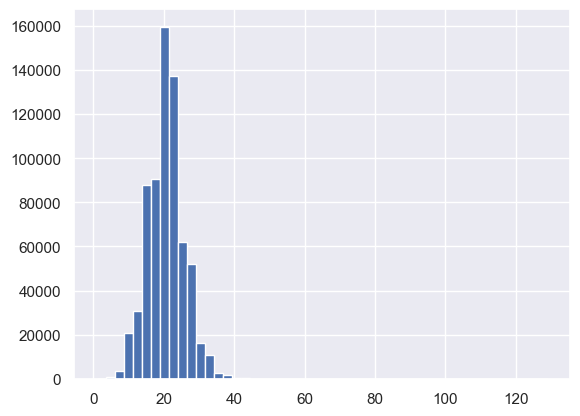

In [10]:
# See distribution of items purchased
df['itemsPurchased'].hist(bins = 50)

In [11]:
# Checking summary statistics of items
df['itemsPurchased'].describe()

count    678028.00000
mean         20.60075
std           5.24590
min           1.00000
25%          17.00000
50%          20.00000
75%          24.00000
max         129.00000
Name: itemsPurchased, dtype: float64

In [134]:
# IQR 
iqr = df['itemsPurchased'].quantile(0.75) - df['itemsPurchased'].quantile(0.25)
items_outliers = df[df['itemsPurchased'] > df['itemsPurchased'].quantile(0.75) + 1.5 * iqr]

# Drop people buying items at random
df = df.drop(index = items_outliers.index)

It generally makes no sense to buy more than around 25 items even in the longest games, the people who are buying ridiculous amounts of items must be selling and re-buying over and over again.

In [13]:
# I want to investigate people who die an absurd amount of times, they are likely trolling
df['deaths'].describe()

count    672576.000000
mean          6.402735
std           3.287402
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          34.000000
Name: deaths, dtype: float64

<Axes: >

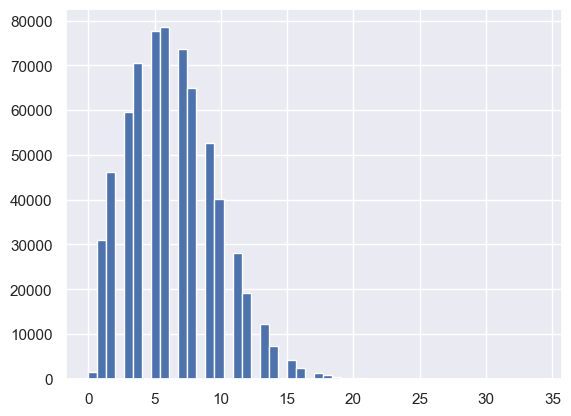

In [14]:
df['deaths'].hist(bins = 50)

In [135]:
# Drop trolls
trolls = df[(df['deaths'] > 10) & (df['assists'] == 0) & (df['kills'] == 0)]
df = df.drop(index = trolls.index)

In [16]:
# Shape after dropping outliers
df.shape

(672506, 58)

## Distributions

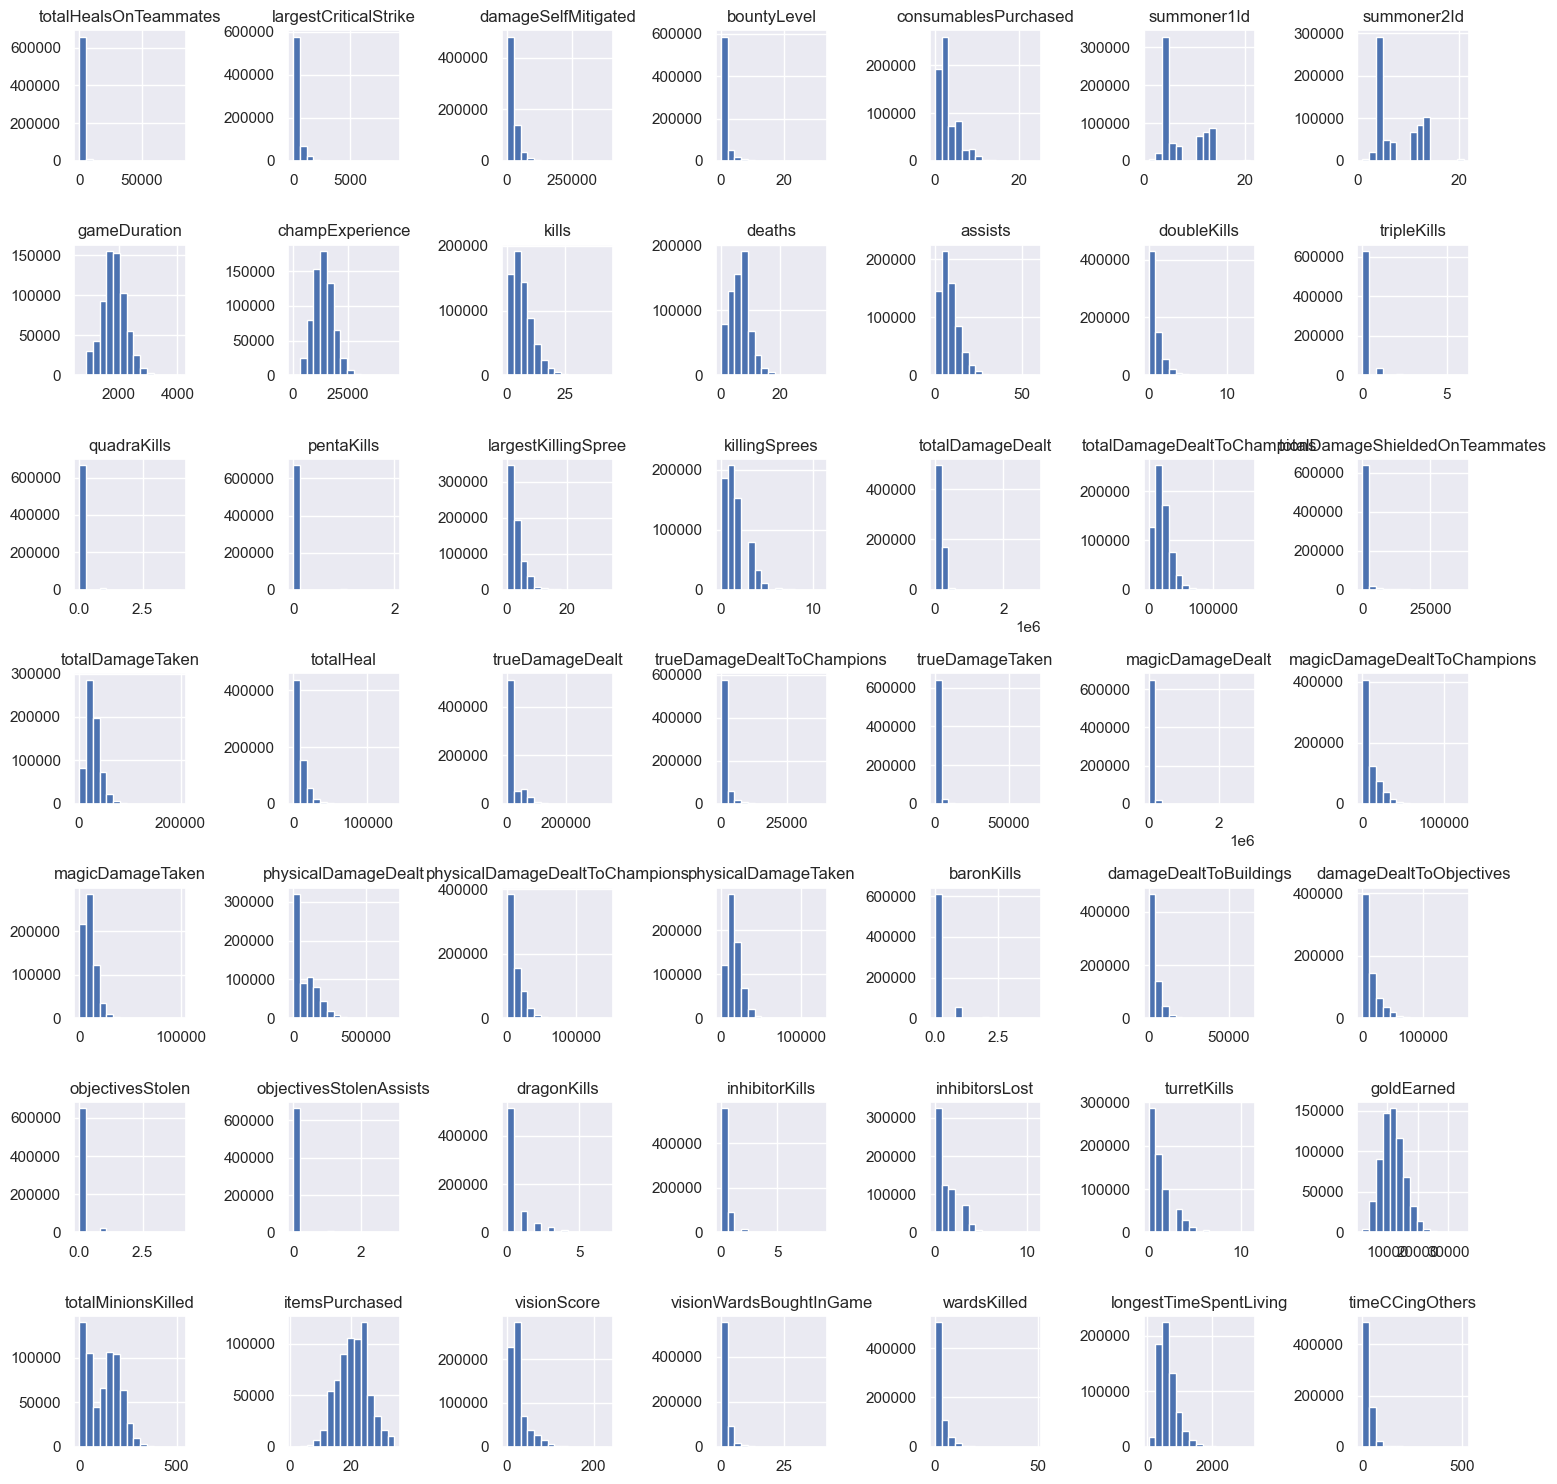

In [17]:
df.select_dtypes(include = np.number).hist(bins = 15, figsize = (15,15))
plt.tight_layout()

In [138]:
for feature in df.select_dtypes(include = np.number).columns:
    zero_percent = (df[feature] == 0).mean() * 100
    if zero_percent > 95:
        print(feature + " has a high proportion of zero values.")

quadraKills has a high proportion of zero values.
pentaKills has a high proportion of zero values.
objectivesStolen has a high proportion of zero values.
objectivesStolenAssists has a high proportion of zero values.


In [139]:
# Dropping features that are probably useless
df = df.drop(columns = ['pentaKills', 'quadraKills', 'objectivesStolenAssists', 'objectivesStolen'])

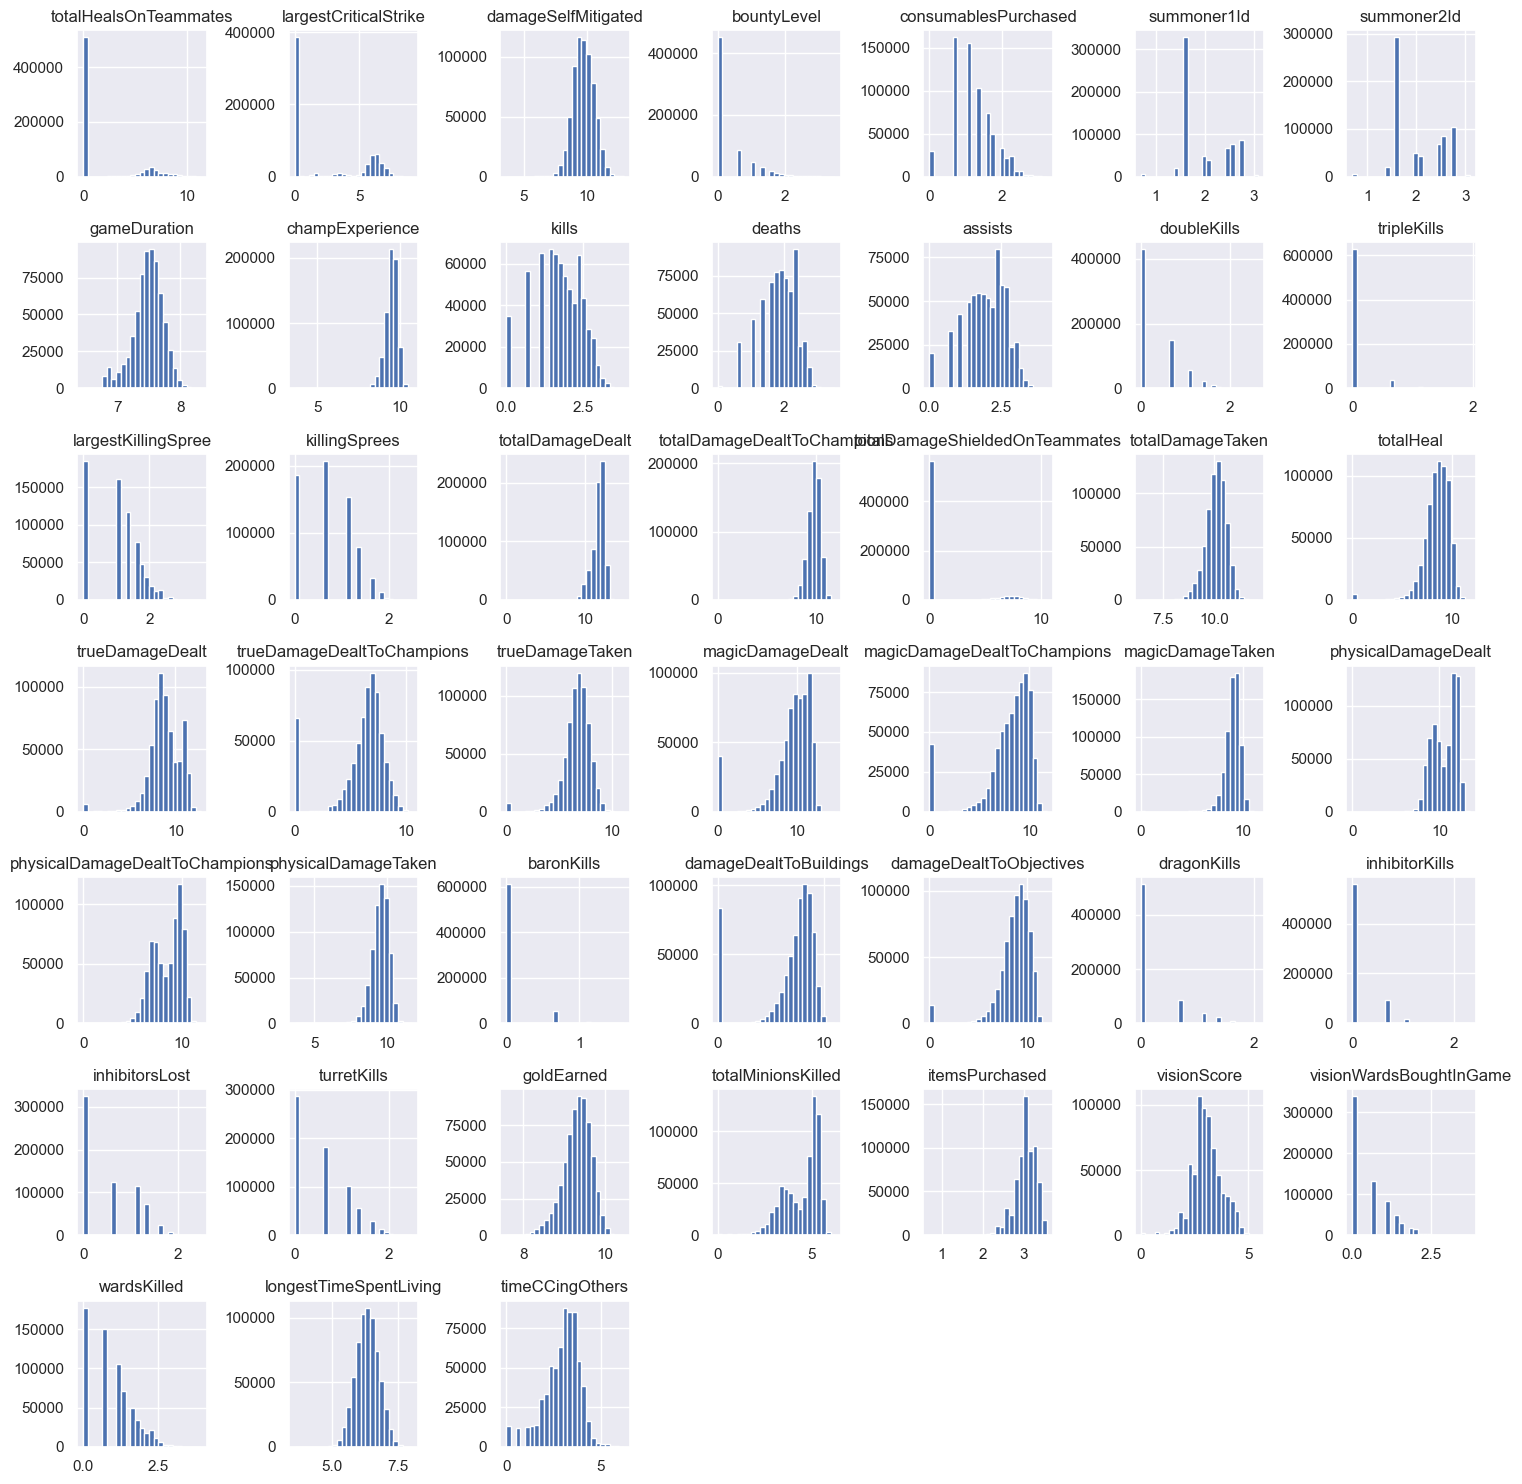

In [140]:
np.log(df.select_dtypes(include = np.number) + 1).hist(bins = 25, figsize = (15,15))
plt.tight_layout()

Columns that seem to benefit from a log transform:
"totalHealsOnTeammates", "largestcriticalstrike", "totalDamageShieldedOnTeammates", "totalHeal", "trueDamageDealt", "trueDamageDealtToChampions", "trueDamageTaken", "magicDamageDealt", "magicDamageDealtToChampions", "magicDamageTaken", "physicalDamageDealt", "physicalDamageDealtToChampions", "physicalDamageTaken", "damageDealtToBuildings", "damageDealtToObjectives", "totalMinionsKilled", "visionScore", "timeCCingOthers"


In [141]:
log_transform_columns = ["totalHealsOnTeammates", "largestCriticalStrike", "totalDamageShieldedOnTeammates", "totalHeal",
                          "trueDamageDealt", "trueDamageDealtToChampions", "trueDamageTaken", "magicDamageDealt",
                            "magicDamageDealtToChampions", "magicDamageTaken", "physicalDamageDealt",
                              "physicalDamageDealtToChampions", "physicalDamageTaken", "damageDealtToBuildings",
                                "damageDealtToObjectives", "totalMinionsKilled", "visionScore", "timeCCingOthers",
]

## Game Duration

<Axes: xlabel='gameDuration', ylabel='Count'>

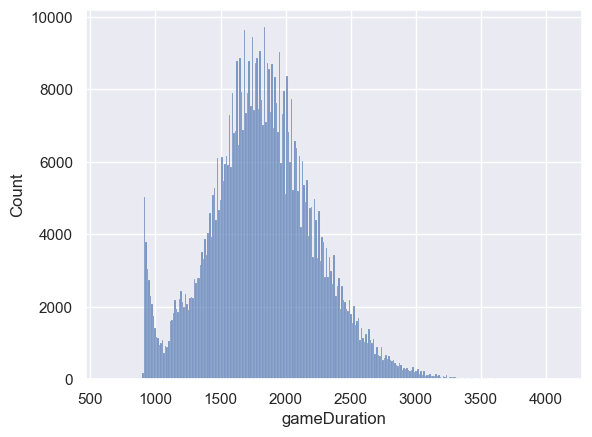

In [22]:
sns.histplot(data = df, x = 'gameDuration')

Normally distributed except huge spike at the 16 minute mark. Most likely represents games that were surrendered as soon as possible (15 minutes is the minimum)

<Axes: xlabel='gameDuration', ylabel='Count'>

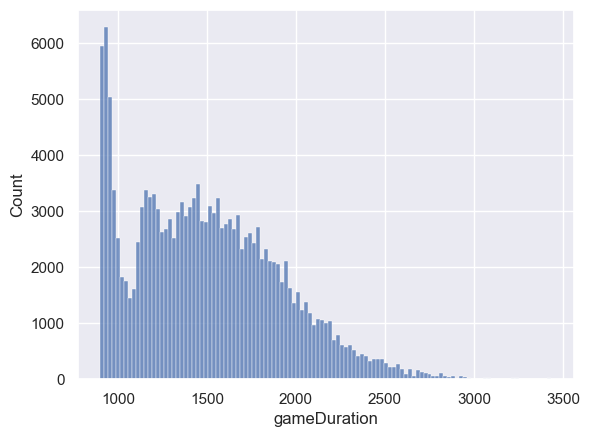

In [23]:
sns.histplot(data = df[df['gameEndedInSurrender'] == True], x = 'gameDuration')

Out of all surrendered games, a large proportion are surrendered around 16 minutes

In [24]:
print("Average Surrendered Game Duration: %.2f minutes" % (df['gameDuration'][df['gameEndedInSurrender'] == True].mean()/60))
print("Median Surrendered Game Duration: %.2f minutes" % (df['gameDuration'][df['gameEndedInSurrender'] == True].median()/60))
print("Percent of Surrendered Games between 15 and 17 minutes: %.2f%%" % (len(df[(df['gameEndedInSurrender'] == True) & (df['gameDuration'] >= 15*60) & (df['gameDuration'] <= 17*60)])*100 / len(df[df['gameEndedInSurrender'] == True])))


Average Surrendered Game Duration: 25.07 minutes
Median Surrendered Game Duration: 24.40 minutes
Percent of Surrendered Games between 15 and 17 minutes: 15.24%


## Correlations

<Axes: >

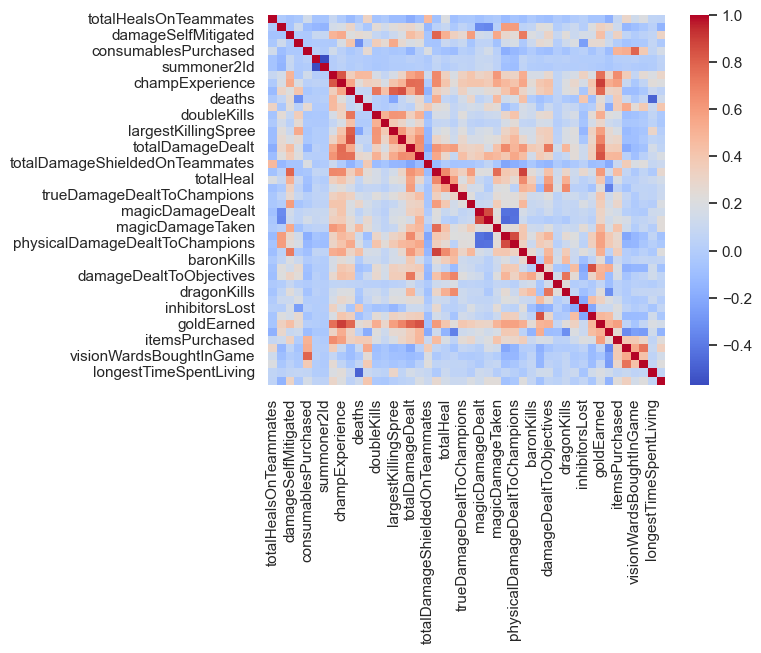

In [25]:
# Correlations between numeric features
corr = df.select_dtypes(include = np.number).corr()
sns.heatmap(corr, cmap = 'coolwarm')

We can see the data is multicollinear, which is expected from a game many features influence one another (i.e kills gets you gold, gold buys you items etc.)

## Correlation With Game Duration

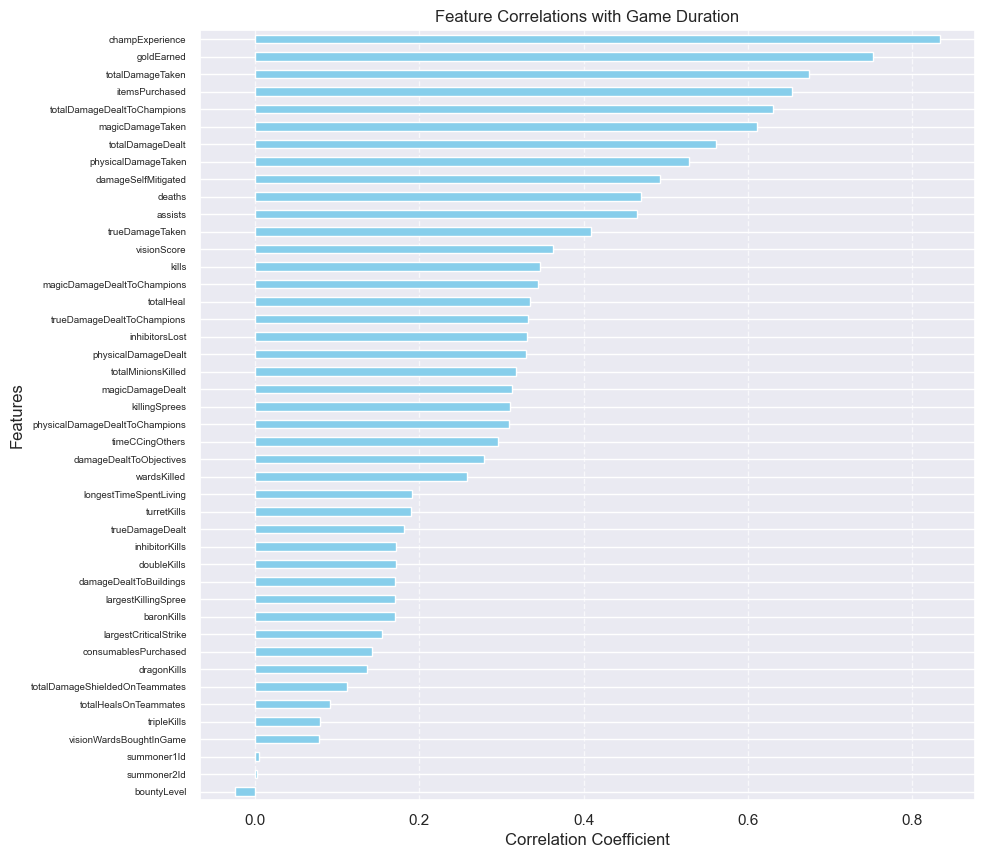

In [142]:
# Correlation with time
time_corrs = df.select_dtypes(include = np.number).corr()['gameDuration'].drop('gameDuration')

# Bar chart
plt.figure(figsize=(10, 10))
time_corrs.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Correlations with Game Duration')
plt.xlabel('Correlation Coefficient')
plt.yticks(fontsize=7)
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Categorical Features

In [27]:
# Check cat features
df.select_dtypes(include = ['object', 'bool']).columns

Index(['teamPosition', 'championName', 'firstBloodAssist', 'firstBloodKill',
       'firstTowerAssist', 'firstTowerKill', 'gameEndedInEarlySurrender',
       'gameEndedInSurrender', 'win'],
      dtype='object')

In [28]:
# Check frequency of team positions
df['teamPosition'].value_counts()

teamPosition
BOTTOM     134938
TOP        134717
JUNGLE     134697
UTILITY    134111
MIDDLE     134018
               25
Name: count, dtype: int64

In [143]:
# Drop games with no team position
df = df.drop(index = df[df['teamPosition'] == ''].index)

In [30]:
# Frequency of role for each champion
champ_roles = pd.crosstab(df['championName'], df['teamPosition'], margins = False)
champ_roles

teamPosition,BOTTOM,JUNGLE,MIDDLE,TOP,UTILITY
championName,,,,,
Aatrox,7,33,160,5862,11
Ahri,36,6,3431,62,141
Akali,22,9,5781,959,10
Akshan,222,15,1805,383,32
Alistar,4,12,37,69,1874
...,...,...,...,...,...
Zeri,1596,12,54,38,5
Ziggs,819,1,840,29,209
Zilean,7,3,143,46,1418


## Mutual Information
Mutual information measures the amount one random variable X tells us about another random variable Y. It is based on entropy stemming from information theory. Given two random variable X and Y, if they are independent, MI will be 0 as P(X,Y) = P(X)P(Y). If non-zero, then high MI tells us that knowing the value of X tells us a lot about the value of Y.

In [31]:
from sklearn.metrics import mutual_info_score

for feature in df.select_dtypes(include = ['object', 'bool']).columns:
    print(f"{feature}: ", mutual_info_score(df['championName'], df[feature]))

teamPosition:  1.1005635488092436
championName:  4.914196914407677
firstBloodAssist:  0.009307783255682416
firstBloodKill:  0.00822000366789064
firstTowerAssist:  0.007656777012669666
firstTowerKill:  0.020543527960304897
gameEndedInEarlySurrender:  0.0
gameEndedInSurrender:  0.0003456414333902877
win:  0.0007847792471616572


All features except teamPosition seemingly tell us nothing about champions, we can most likely drop these features.

# Feature Transformation

In [144]:
# Divide features correlated with time to be in a per second basis, leave rest normal
df_num = df.select_dtypes(include = np.number)
df[time_corrs[time_corrs > 0.2].index] = df[time_corrs[time_corrs > 0.2].index].div(df['gameDuration'], axis = 0)

# Log transform 
df[log_transform_columns] = np.log(df[log_transform_columns] + 1)

# Keep track of champion names indices
champion_names = df['championName']

# Drop irrevant features
df = df.drop(columns = ['gameDuration', 'summoner1Id', 'summoner2Id', 'gameEndedInEarlySurrender', 'championName',
                        'firstBloodAssist', 'firstBloodKill', 'firstTowerAssist', 'firstTowerKill', 'gameEndedInSurrender',
                        'win'], axis = 1)

# Preprocessing

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define numerical and categorical feature names
num_features = df.select_dtypes(include = np.number).columns.tolist()
cat_features = df.drop(columns = num_features).columns.tolist()


# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),  # Standardize numerical features
        ('cat', OneHotEncoder(sparse_output=False), cat_features) # One hot encode
    ]
)

# Transform the data
transformed_array = preprocessor.fit_transform(df)

# Get feature names for the transformed data
num_feature_names = num_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
all_feature_names = num_feature_names + cat_feature_names.tolist()

# Convert transformed data back to a DataFrame
transformed_df = pd.DataFrame(transformed_array, columns=all_feature_names, index = champion_names.index)

# Check result
transformed_df

,totalHealsOnTeammates,largestCriticalStrike,damageSelfMitigated,bountyLevel,consumablesPurchased,champExperience,kills,deaths,assists,doubleKills,...,visionScore,visionWardsBoughtInGame,wardsKilled,longestTimeSpentLiving,timeCCingOthers,teamPosition_BOTTOM,teamPosition_JUNGLE,teamPosition_MIDDLE,teamPosition_TOP,teamPosition_UTILITY
0,-0.556024,0.183066,5.102455,0.045505,-0.451460,1.577119,0.271789,-0.098920,0.712827,-0.594335,...,-0.520763,-0.666195,-0.636613,-0.848500,0.633718,0.0,0.0,0.0,1.0,0.0
1,-0.556024,-0.822073,1.339811,0.572472,-0.855388,1.147573,-0.027615,0.352953,1.512136,0.425395,...,0.072585,-0.666195,-0.147334,-0.802085,-0.900681,0.0,1.0,0.0,0.0,0.0
2,-0.556024,1.460292,0.011447,-0.481463,1.568180,0.698478,2.217910,1.482636,0.446391,1.445125,...,-0.520763,-0.127378,-0.881253,-0.602142,-0.991835,0.0,0.0,1.0,0.0,0.0
4,2.063930,-0.822073,-0.161784,0.572472,-0.451460,-0.586861,-0.925824,-0.550793,1.645354,-0.594335,...,0.735982,-0.666195,-0.636613,-0.655698,0.155405,0.0,0.0,0.0,0.0,1.0
5,-0.556024,-0.822073,1.633282,-0.481463,-0.451460,0.776924,-1.225228,1.030763,0.846045,-0.594335,...,-0.520763,-0.666195,-0.391974,-0.894915,1.582099,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719585,-0.556024,1.401793,0.389854,-0.481463,0.356396,2.575893,1.803514,0.985735,-0.844763,0.425395,...,-0.268679,-0.666195,-0.881253,-0.337932,-0.465896,0.0,0.0,0.0,1.0,0.0
719586,-0.556024,-0.822073,0.794635,-0.481463,0.356396,1.131612,0.214292,-0.213528,-0.137646,0.425395,...,-0.702848,0.411438,0.417286,1.665067,0.141172,0.0,1.0,0.0,0.0,0.0
719587,-0.556024,1.305860,1.852958,-0.481463,-0.047532,1.568481,0.532137,0.266177,-0.137646,-0.594335,...,-0.584254,-0.127378,-0.881253,0.051243,-0.209743,0.0,0.0,1.0,0.0,0.0
719588,-0.556024,-0.822073,0.457550,-0.481463,-0.047532,-0.367379,-0.739241,0.026324,0.852317,0.425395,...,0.320394,-0.666195,-0.881253,0.711768,0.172999,0.0,0.0,0.0,0.0,1.0


# PCA

In [156]:
from sklearn.decomposition import PCA

# Capture first 6 pcs
pca = PCA(n_components=6, random_state=1)
# Fit to df
pca_fitted = pca.fit(transformed_df.drop(columns = cat_feature_names))

In [157]:
# Visualize loadings of principal components
loadings = pd.DataFrame(data = pca.components_.T, index = transformed_df.drop(columns = cat_feature_names).columns, columns = [f"PC{i+1}" for i in range(len(pca.components_))])
# Show first few loadings (styler object)
loadings_matrix = loadings.round(2).head(5).style.background_gradient(cmap='coolwarm')
loadings_matrix

,PC1,PC2,PC3,PC4,PC5,PC6
totalHealsOnTeammates,-0.090000,-0.060000,0.040000,-0.230000,0.020000,0.050000
largestCriticalStrike,0.120000,-0.080000,-0.200000,-0.250000,0.050000,0.020000
damageSelfMitigated,0.130000,0.290000,0.020000,0.060000,0.090000,0.270000
bountyLevel,0.140000,-0.150000,0.140000,-0.060000,-0.080000,-0.110000
consumablesPurchased,-0.100000,-0.010000,0.250000,-0.170000,0.230000,0.120000


In [158]:
pca.explained_variance_

array([9.10432256, 4.24032648, 4.13669635, 3.10126103, 2.32235233,
       1.80574479])

In [159]:
# Print top 10 loadings for each principal component
for pc in loadings.columns:
    
    print(f"Top loadings for {pc}:")
    # Find 10 absolute largest loadings
    top_loadings = loadings[pc].apply(abs).nlargest(10)
    # For each loading, get index and value
    for idx, value in top_loadings.items():
        # Locate value (not abs) by index
        real_value = loadings[pc].loc[idx].round(2)
        # Print index (feature name) and value
        print(f"{idx}: {real_value}")
    print("----------------------")

Top loadings for PC1:
goldEarned: 0.29
totalDamageDealt: 0.27
kills: 0.25
champExperience: 0.25
damageDealtToObjectives: 0.23
largestKillingSpree: 0.23
totalDamageDealtToChampions: 0.23
physicalDamageDealt: 0.22
killingSprees: 0.22
physicalDamageDealtToChampions: 0.2
----------------------
Top loadings for PC2:
totalDamageTaken: 0.36
physicalDamageTaken: 0.31
totalMinionsKilled: -0.3
damageSelfMitigated: 0.29
totalHeal: 0.27
trueDamageDealt: 0.26
dragonKills: 0.23
magicDamageTaken: 0.2
trueDamageTaken: 0.19
damageDealtToBuildings: -0.19
----------------------
Top loadings for PC3:
magicDamageDealtToChampions: 0.31
physicalDamageDealt: -0.27
visionScore: 0.27
assists: 0.27
magicDamageDealt: 0.26
consumablesPurchased: 0.25
physicalDamageDealtToChampions: -0.24
visionWardsBoughtInGame: 0.23
wardsKilled: 0.21
largestCriticalStrike: -0.2
----------------------
Top loadings for PC4:
magicDamageDealt: 0.4
magicDamageDealtToChampions: 0.39
physicalDamageDealtToChampions: -0.27
wardsKilled: -0.

From this:<br> 
PC1: Seems to be related to gold and damage, something along the lines of AD carry ability<br>
PC2: Vision + Assists + CC = Support ability<br>
PC3: All related to damage taken<br>
PC4: Magic damage, no physical damage or critical strikes = Mage ability<br>
PC5: More deaths, less dragons, no bounty = Vulnerability<br>
PC6: Damage to towers, tower kills, no kill participation = Tower pushing<br>


In [185]:
# Transform original df into df with corresponding pcs
pca_transformed = pca_fitted.transform(transformed_df.drop(columns = cat_feature_names))
pca_transformed_df = pd.DataFrame(data = pca_transformed, columns = ['AD Carry', 'Resilience', 'Support', 'AP Carry', 'Vulnerability', 'Tower Pushing'], index = champion_names.index)
# Add champion names back for exploration
pca_transformed_df['championName'] = champion_names
pca_transformed_df.head(10)

,AD Carry,Resilience,Support,AP Carry,Vulnerability,Tower Pushing,championName
0,4.954692,5.329229,0.112910,1.148880,0.071677,3.185909,Sion
1,3.357785,2.671372,0.698005,1.149354,-0.624489,0.612869,Shyvana
2,2.920738,-0.437136,-0.581369,0.052585,3.424557,-0.994715,Akshan
4,-3.105888,-0.110159,0.567087,-0.081074,-1.570599,0.136233,Bard
5,-0.747397,2.570213,0.181562,3.672259,-0.029126,1.531056,Singed
6,3.036521,5.205733,-0.272366,-1.009216,-0.880622,0.280223,Briar
7,2.731641,-0.217243,-1.744112,-1.406295,2.029751,-0.334554,Talon
8,3.531255,-1.195094,0.121015,0.364169,2.159413,-0.954862,Kaisa
9,-2.660877,-0.517062,1.528029,2.215672,0.207499,0.659775,Lux
20,-1.675936,-0.759615,-3.275862,0.671912,-0.770667,0.206713,Yone


# Clustering

To determine the optimal number of clusters, the elbow method and silhouette method can be applied.

## Elbow Method

<Axes: xlabel='Clusters', ylabel='WCSS'>

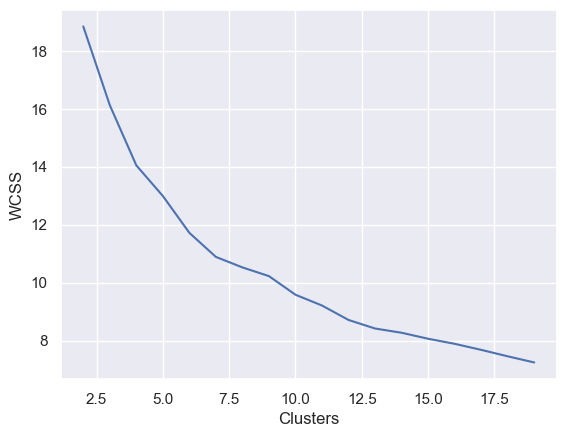

In [215]:
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist

# Adding team position back for clustering

# Dropping champion name
X = pca_transformed_df.drop(columns=['championName'])


clusters_list = []
wcss_list = []

for k in range(2,20):
    kmeans = MiniBatchKMeans(n_clusters= k, init = 'k-means++', random_state=42)
    fitted_kmeans = kmeans.fit(X)
    wcss = sum(np.min(cdist(X, fitted_kmeans.cluster_centers_, 'euclidean'), axis = 1) ** 2 / X.shape[0])
    clusters_list.append(k)
    wcss_list.append(wcss)

elbow_method = {'Clusters': clusters_list, 'WCSS': wcss_list}
elbow_df = pd.DataFrame(elbow_method)
sns.lineplot(data = elbow_df, x = 'Clusters', y = 'WCSS')

In [216]:
kmeans = MiniBatchKMeans(n_clusters=7, random_state = 42)
kmeans.fit(X)

# Create new column in dataframe with cluster labels
X['cluster'] = kmeans.labels_

# Add champion names back in
X['championName'] = champion_names

In [217]:
X['cluster'].value_counts()

cluster
1    107443
5    106601
4    103740
3    103164
0    102357
6     96022
2     53154
Name: count, dtype: int64

In [231]:
# Step 1: Calculate the occurrence of each cluster for each champion
cluster_counts = (
    X.groupby(['championName', 'cluster'])
    .size()
    .reset_index(name='count')
)

# Step 2: Rank clusters based on their count for each champion
cluster_counts['rank'] = (
    cluster_counts.groupby('championName')['count']
    .rank(method='dense', ascending=False)
)

# Step 3: Keep only the top 2 clusters for each champion
top_clusters = cluster_counts[cluster_counts['rank'] == 1]

# Step 4: Merge with the original dataset to calculate feature averages
merged_data = X.merge(top_clusters[['championName', 'cluster']], on=['championName', 'cluster'])

# Step 5: Calculate averages for each feature based on the top 2 clusters
result = (
    merged_data.groupby(['championName', 'cluster'])
    [['AD Carry', 'Resilience', 'Support', 'AP Carry', 'Vulnerability', 'Tower Pushing']]
    .median()
    .reset_index()
)

In [228]:
from sklearn.preprocessing import MinMaxScaler

# Normalize for better tableau viz
scaler = MinMaxScaler()
result_normalized = pd.DataFrame(scaler.fit_transform(result[['AD Carry', 'Resilience', 'Support', 'AP Carry', 'Vulnerability', 'Tower Pushing']]), columns = ['AD Carry', 'Resilience', 'Support', 'AP Carry', 'Vulnerability', 'Tower Pushing'])
result_normalized['championName'] = result['championName']
result_normalized['cluster'] = result['cluster']

In [230]:
# Export to csv for tableau viz
result_normalized.to_csv("clusterdata.csv", index = False)